# Data Cleaning  & EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import f1_score, precision_score, recall_score



In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Key Insights**


*   there are **zero values** which means there are missing values in many features!
*   **pregnancies** has outliers reach to **17**.


*  **25%** of **SkinThickness**, **Insulin** is **zero** which indicates data quality issue!





   




In [8]:
#calculate % of zeros in each column
zeros=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total=len(df)
for i in zeros:
  countzeros=(df[i]==0).sum()
  print(i,"has total ",countzeros,"zeros with percentage ",countzeros/total*100)

Pregnancies has total  111 zeros with percentage  14.453125
Glucose has total  5 zeros with percentage  0.6510416666666667
BloodPressure has total  35 zeros with percentage  4.557291666666666
SkinThickness has total  227 zeros with percentage  29.557291666666668
Insulin has total  374 zeros with percentage  48.69791666666667
BMI has total  11 zeros with percentage  1.4322916666666665




* Insulin (48.70%) and Skin Thickness (29.56%) have the highest proportion of zero values.

*  Glucose and BMI have few zero values indicating minimal data quality concerns.

*   Pregnancies (14.45%) may be  valid as some women may not have any pregnancies.






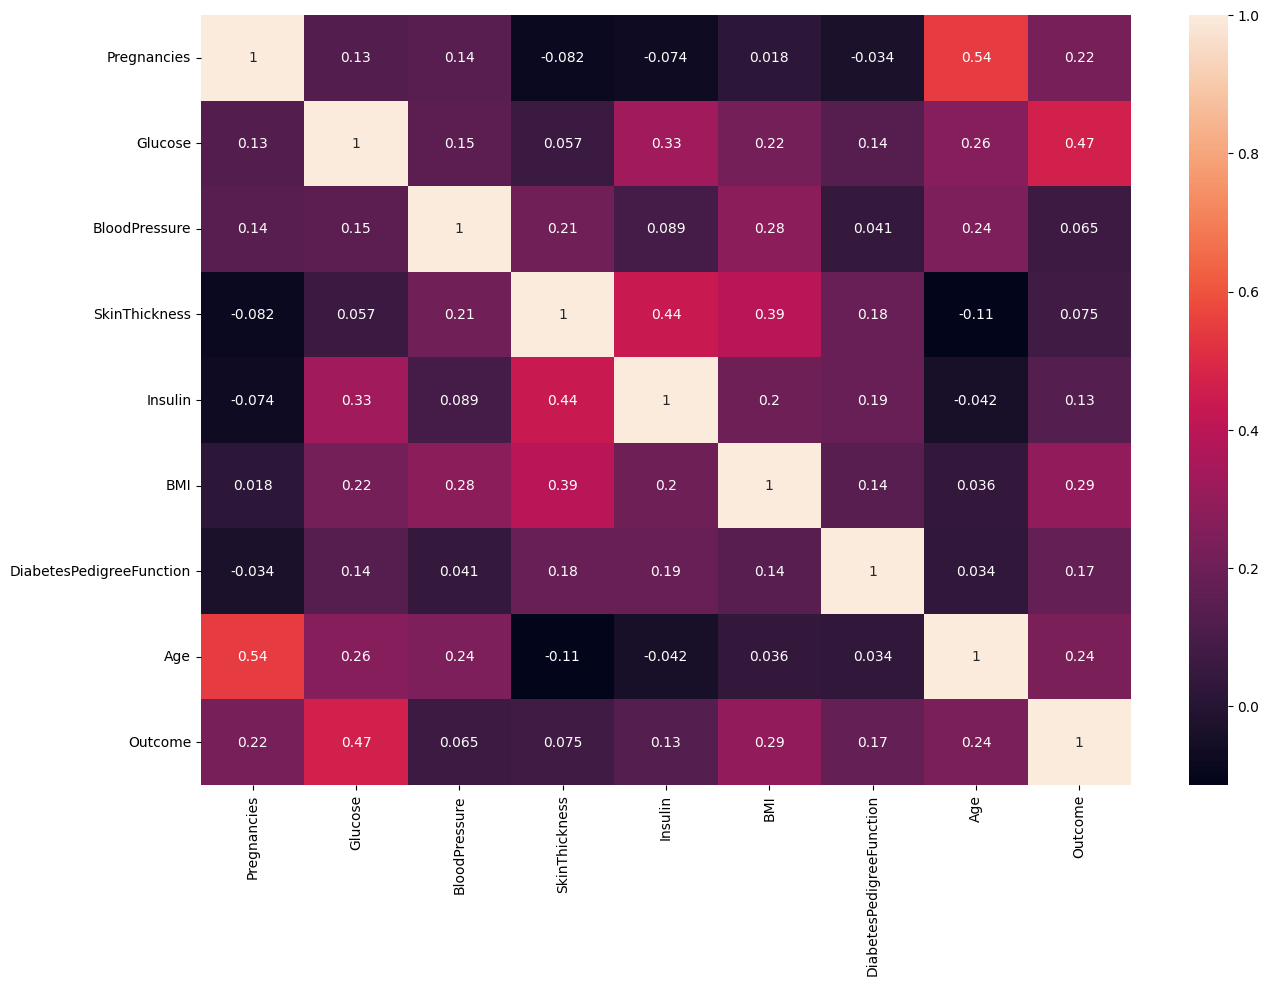

In [9]:
#show which columns has great influence on targert
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


*  **Glucose** has the highest correlation with Outcome

*  **Glucose** and **BMI** the most important features




**Blot Outliers**

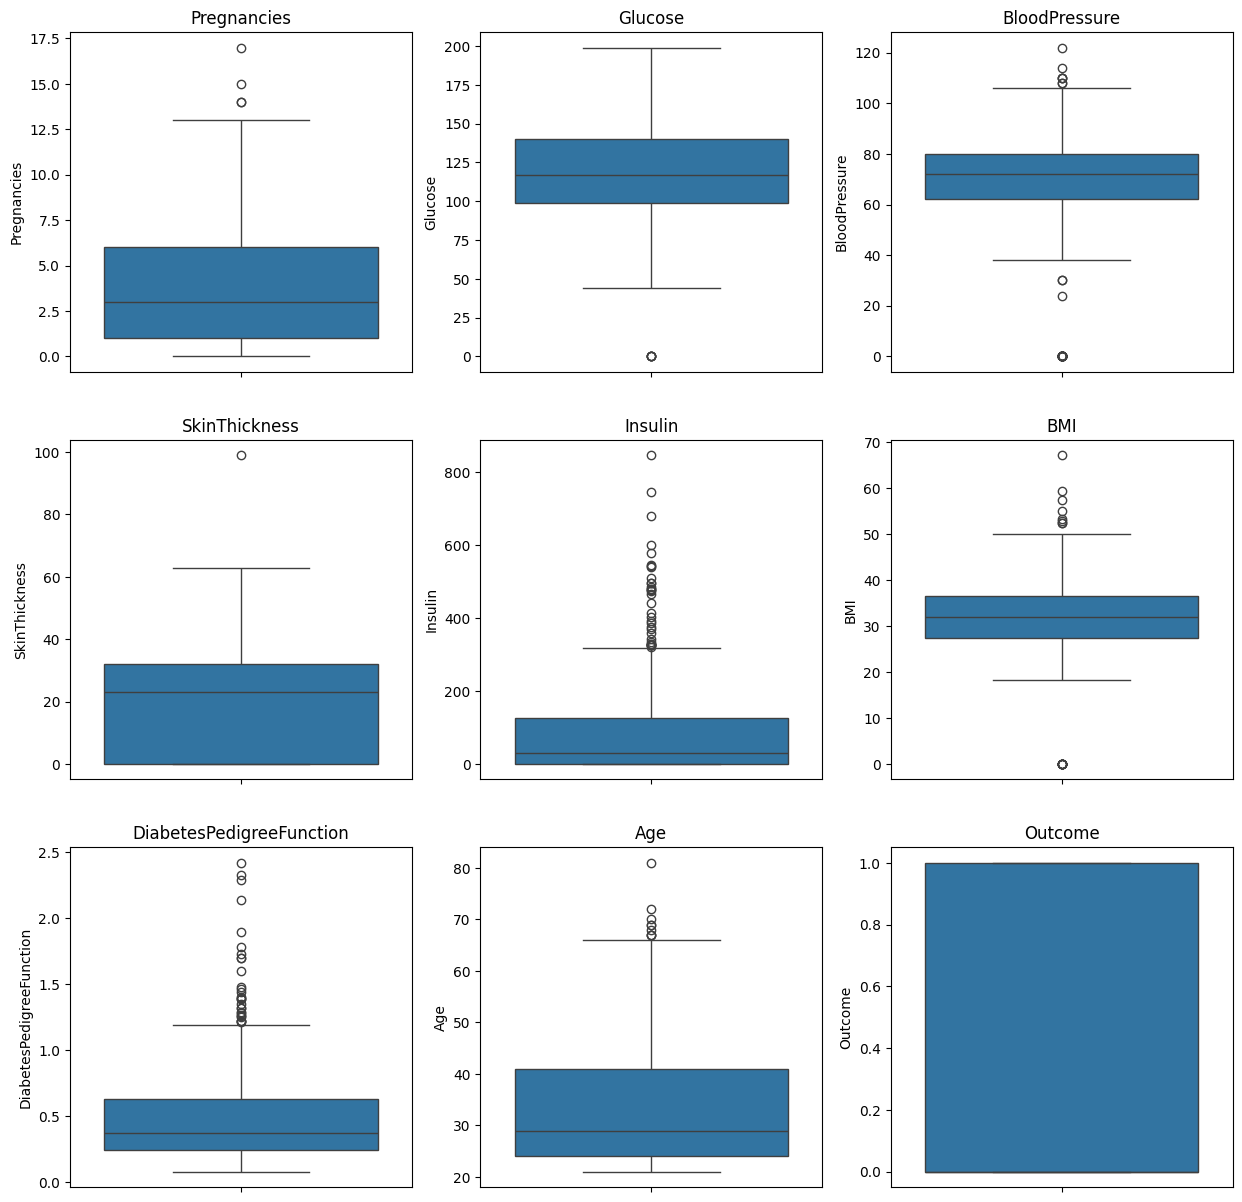

In [10]:
plt.figure(figsize=(15,15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3,3 ,i)
    sns.boxplot(df[col])
    plt.title(col)
plt.show()

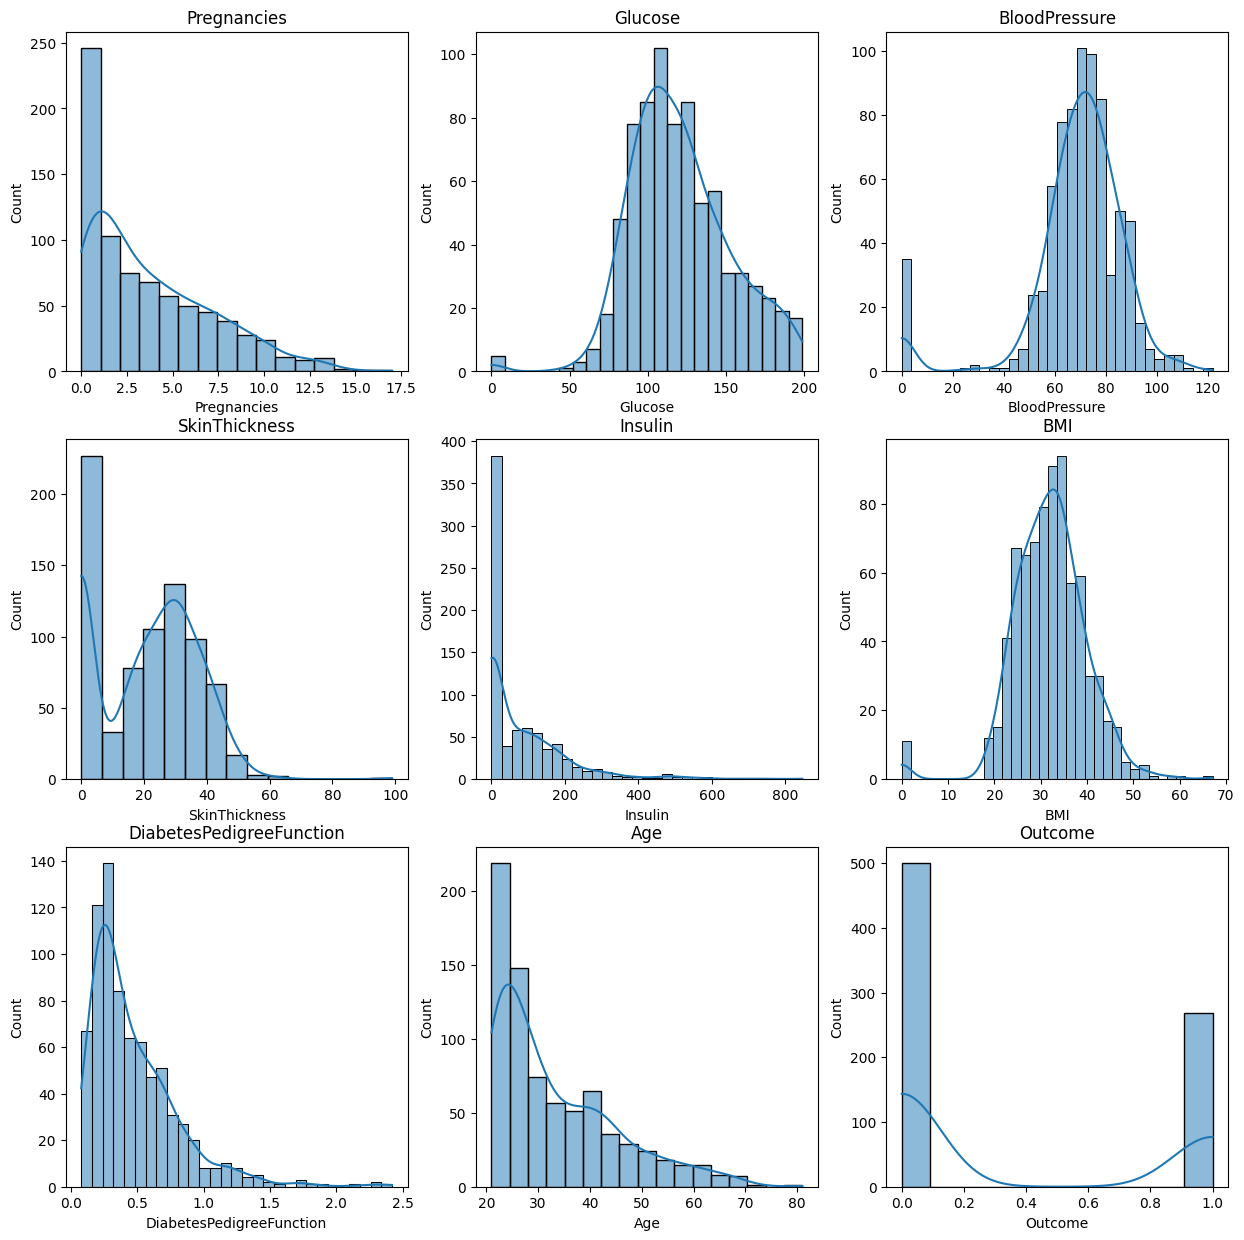

In [11]:
plt.figure(figsize=(15,15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3,3 ,i)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

**key insights**


*   **DiabetesPedigreeFunction** , **Insulin** , **skinthickness** are skewed.
*   **Insulin** has few outliers above 600.


*   **BloodPressure** has some outliers **above 100** which is **Hypertension Stage** and there are few numbers < 40 while **normal Diastolic 60-80 mmHg** .
*   **BMI** , **Age** ,**DiabetesPedigreeFunction** blots show outliers but the values are valid and will solve this using standarzation later!





**Handle Outliers**

In [12]:
#show 99 percentile to use for capping outliers
df.quantile(0.99)

Pregnancies                  13.00000
Glucose                     196.00000
BloodPressure               106.00000
SkinThickness                51.33000
Insulin                     519.90000
BMI                          50.75900
DiabetesPedigreeFunction      1.69833
Age                          67.00000
Outcome                       1.00000
Name: 0.99, dtype: float64

In [13]:
def cap_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

cap_iqr(df, 'Pregnancies')
cap_iqr(df, 'BloodPressure')
cap_iqr(df, 'SkinThickness')
cap_iqr(df, 'Insulin')


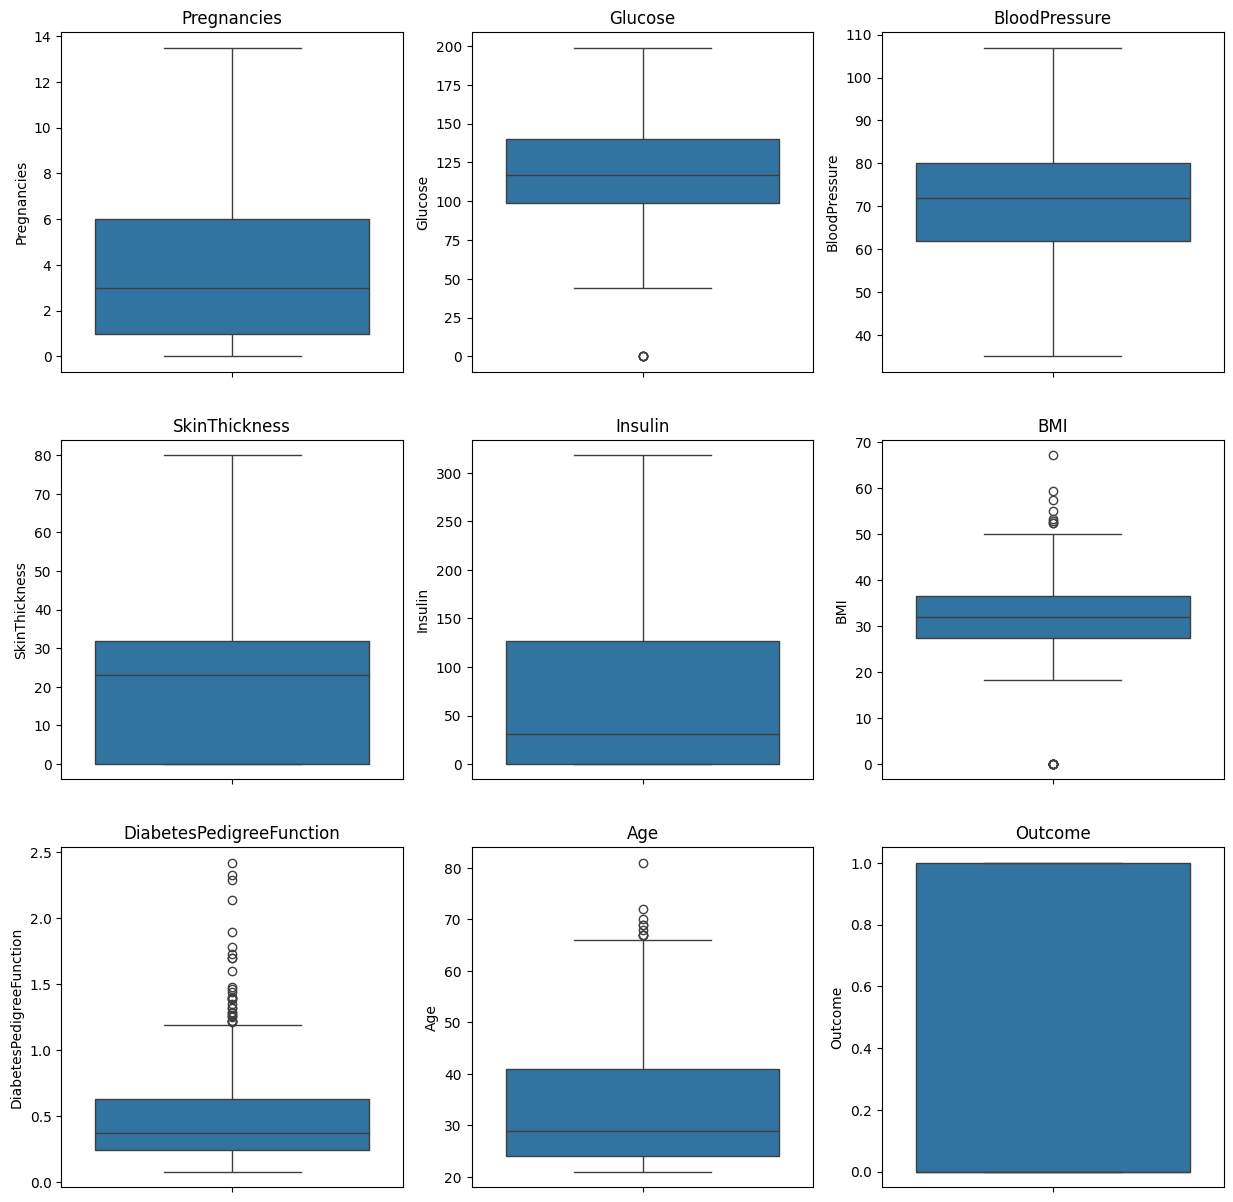

In [14]:
plt.figure(figsize=(15,15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3,3 ,i)
    sns.boxplot(df[col])
    plt.title(col)
plt.show()

**Handle Zero Values**

In [15]:
# fill BMI , Glucose by median as it is low value
df['BMI']=df['BMI'].replace(0,np.nan)
df['Glucose']=df['Glucose'].replace(0,np.nan)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)

C:\Users\alaa\AppData\Local\Temp\ipykernel_20244\4059277206.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].median(),inplace=True)
C:\Users\alaa\AppData\Local\Temp\ipykernel_20244\4059277206.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [16]:
cols_zero = ['Insulin', 'SkinThickness']
df[cols_zero] = df[cols_zero].replace(0, np.nan)

for col in cols_zero:
    median_outcome_0 = df[df['Outcome'] == 0][col].median()
    median_outcome_1 = df[df['Outcome'] == 1][col].median()

    df.loc[(df['Outcome'] == 0) & (df[col].isna()), col] = median_outcome_0
    df.loc[(df['Outcome'] == 1) & (df[col].isna()), col] = median_outcome_1

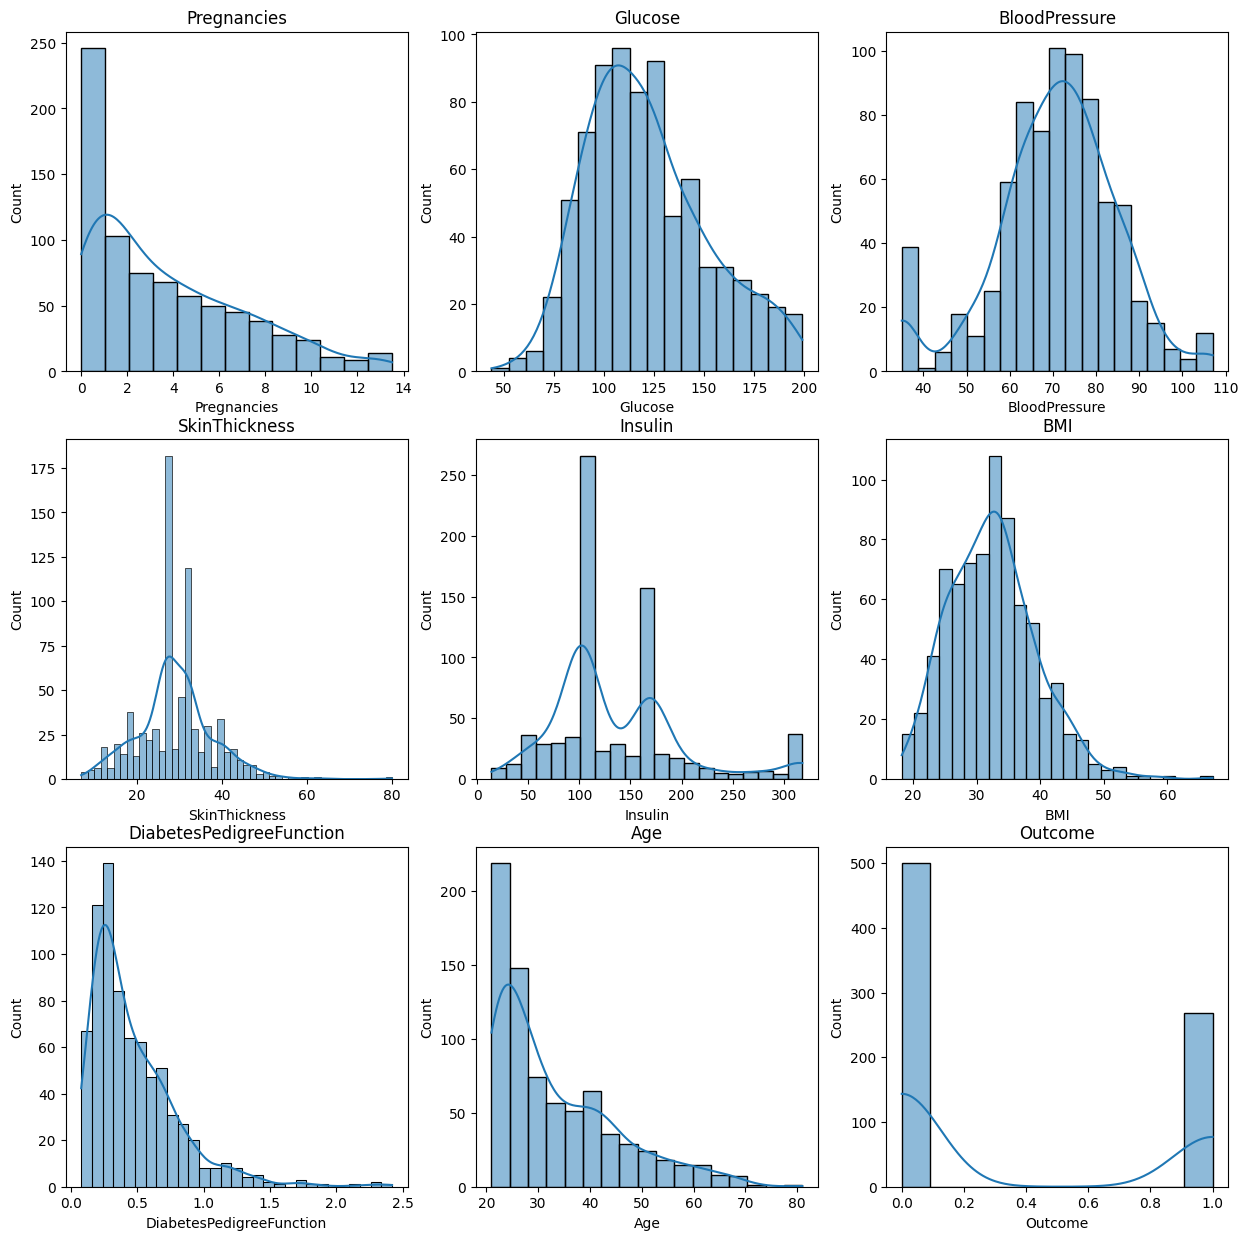

In [17]:
plt.figure(figsize=(15,15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3,3 ,i)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.656250,70.684896,29.065104,135.607096,32.455208,0.471876,33.240885,0.348958
std,3.344157,30.438286,14.197239,8.720844,64.628872,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,35.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,67.100000,2.420000,81.000000,1.000000


#EDA & Visual Relationships


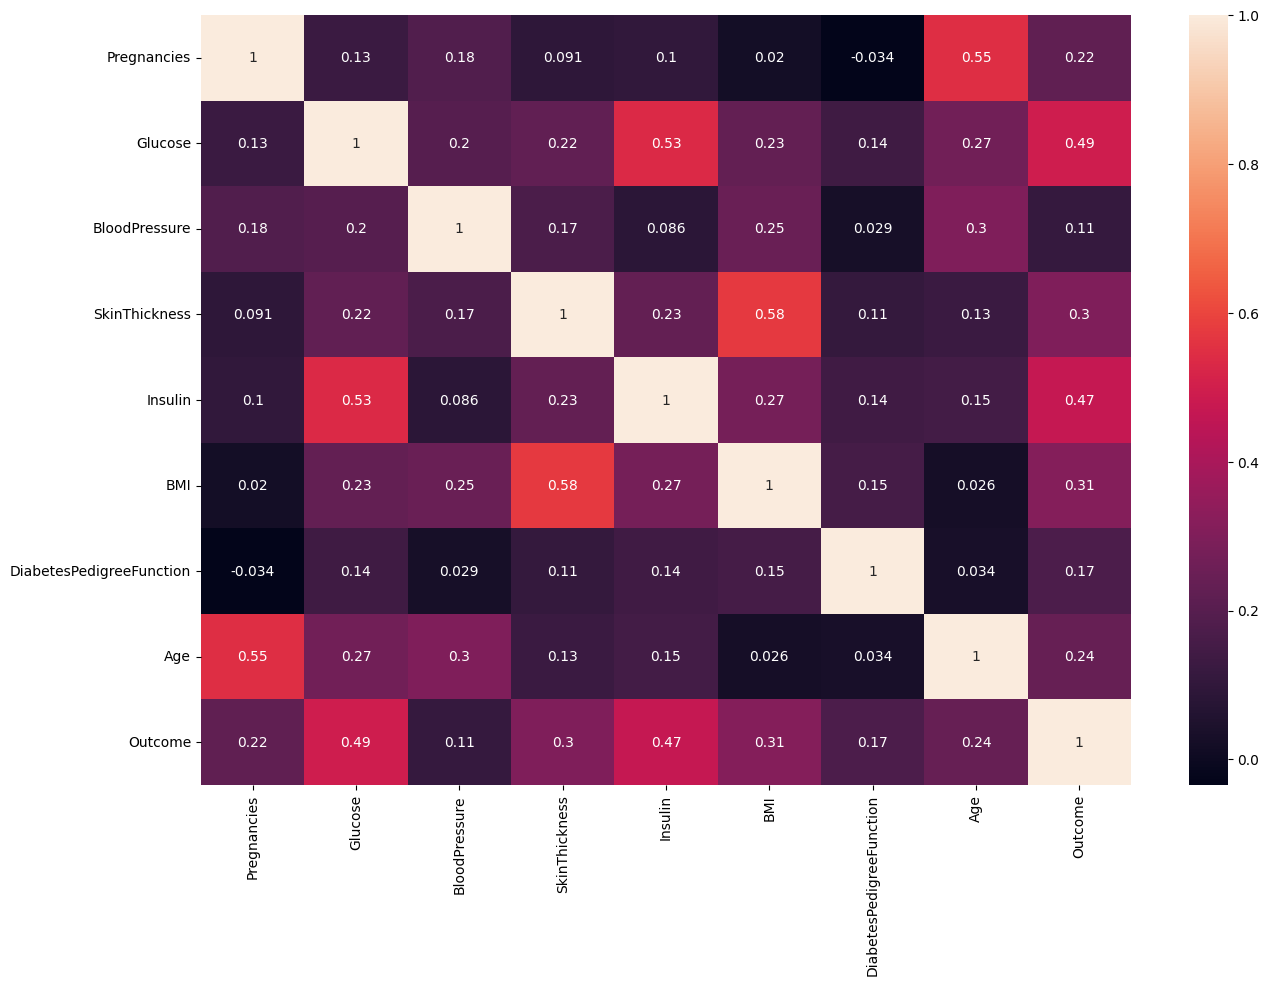

In [20]:
#correlation between features after handling data issues
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

After data cleaning and preprocessing, the correlations between some features and the target (diabetes outcome) have changed, Specifically:




*  The correlation between  GLucose , SkinThickness  BloodPressure , Insulin , BMI, with the target has increased.

















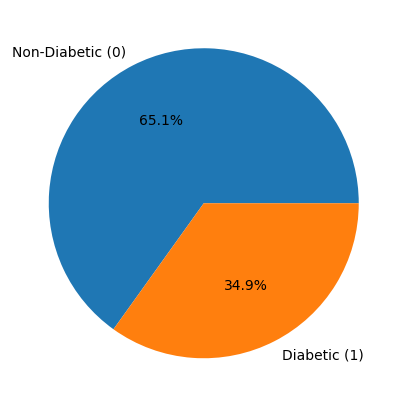

In [21]:
#Percentage of outcome
labels = ['Non-Diabetic (0)', 'Diabetic (1)']
plt.figure(figsize=(5,10))
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%1.1f%%',)
plt.show()

data is imbalanced as more than half is non diabetic!

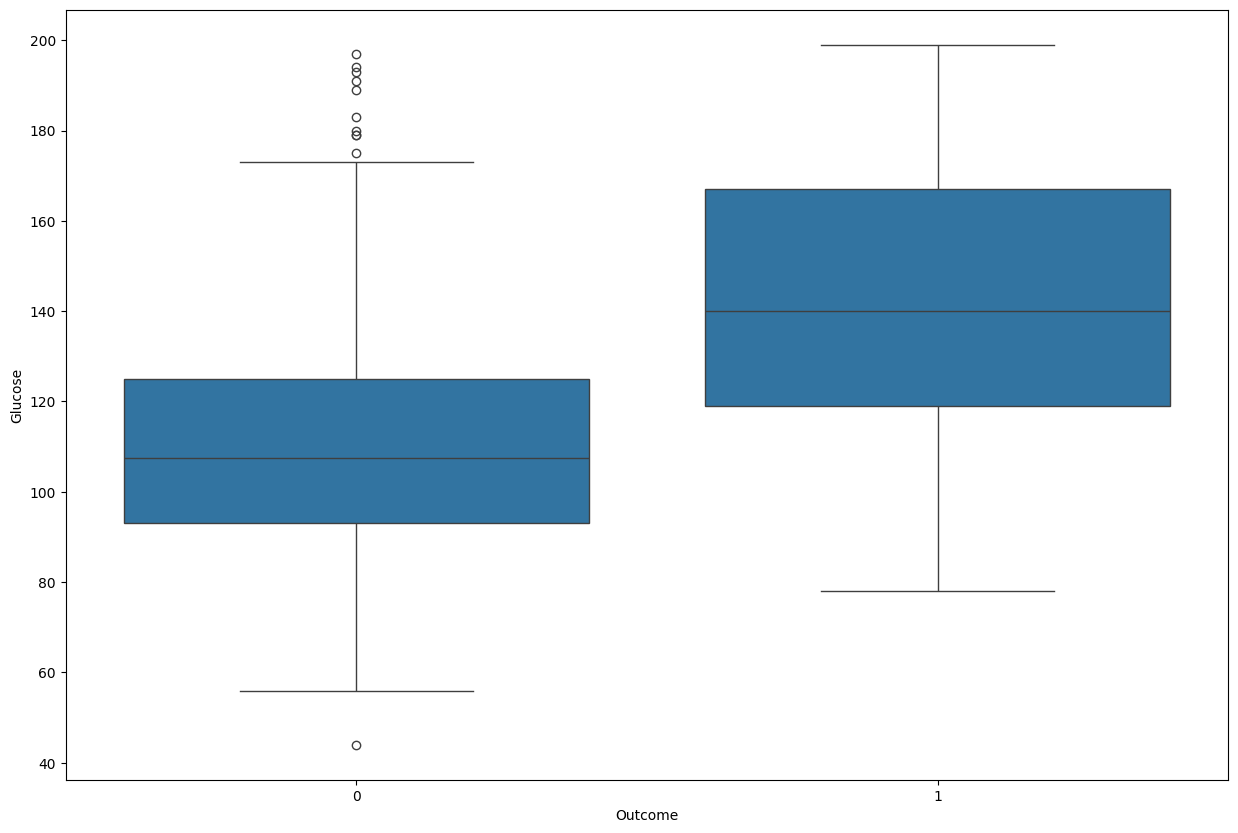

In [22]:
#show the relation between glucose and diapetic disease
plt.figure(figsize=(15,10))
sns.boxplot(x='Outcome',y='Glucose',data=df)
plt.show()

**Insight:** Individuals with glucose levels in the range of 90–120 mg/dL are predominantly non-diabetic. However, glucose levels above 120 mg/dL significantly increase the likelihood of being diagnosed as diabetic.

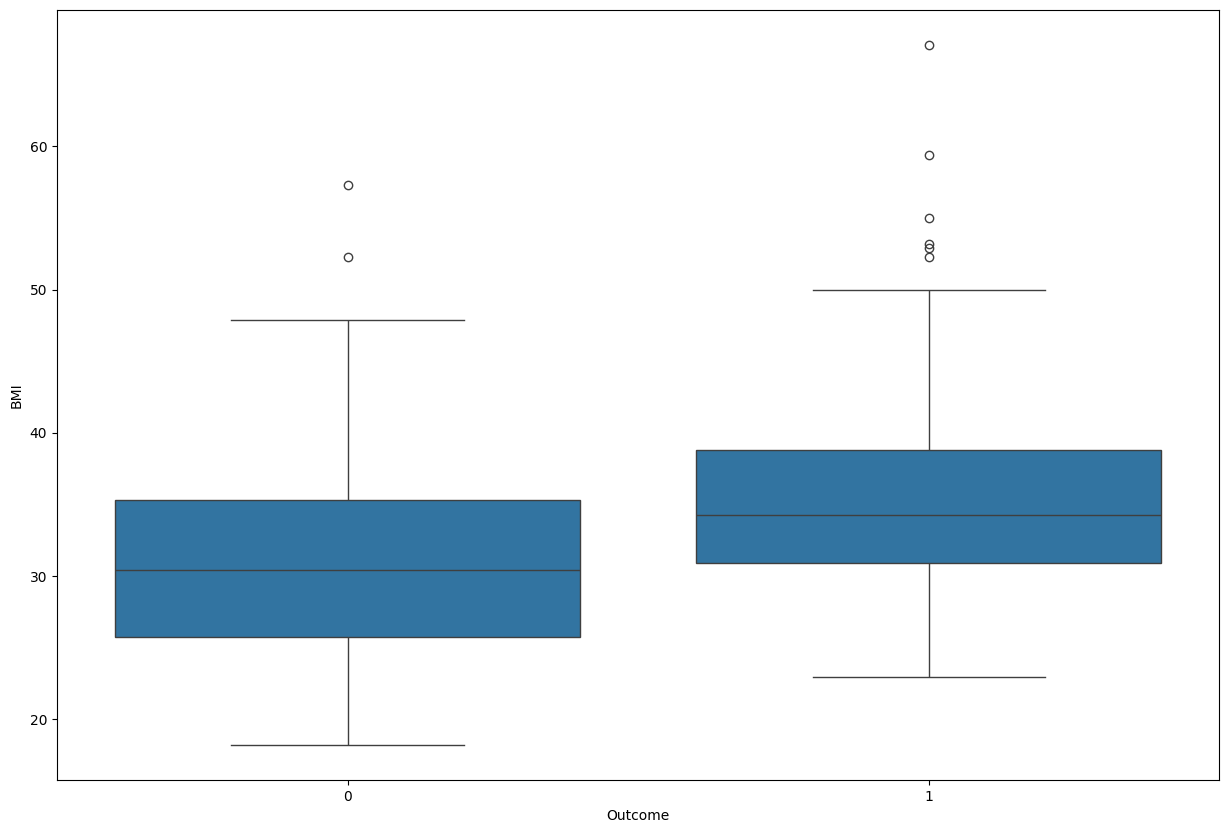

In [23]:
#show the relation between BMI and diapetic disease
plt.figure(figsize=(15,10))
sns.boxplot(x='Outcome',y='BMI',data=df)
plt.show()

**Insight:** Higher BMI is associated with a greater likelihood of being diabetic. Patients with diabetes tend to have higher BMI compared to non-diabetic individuals.

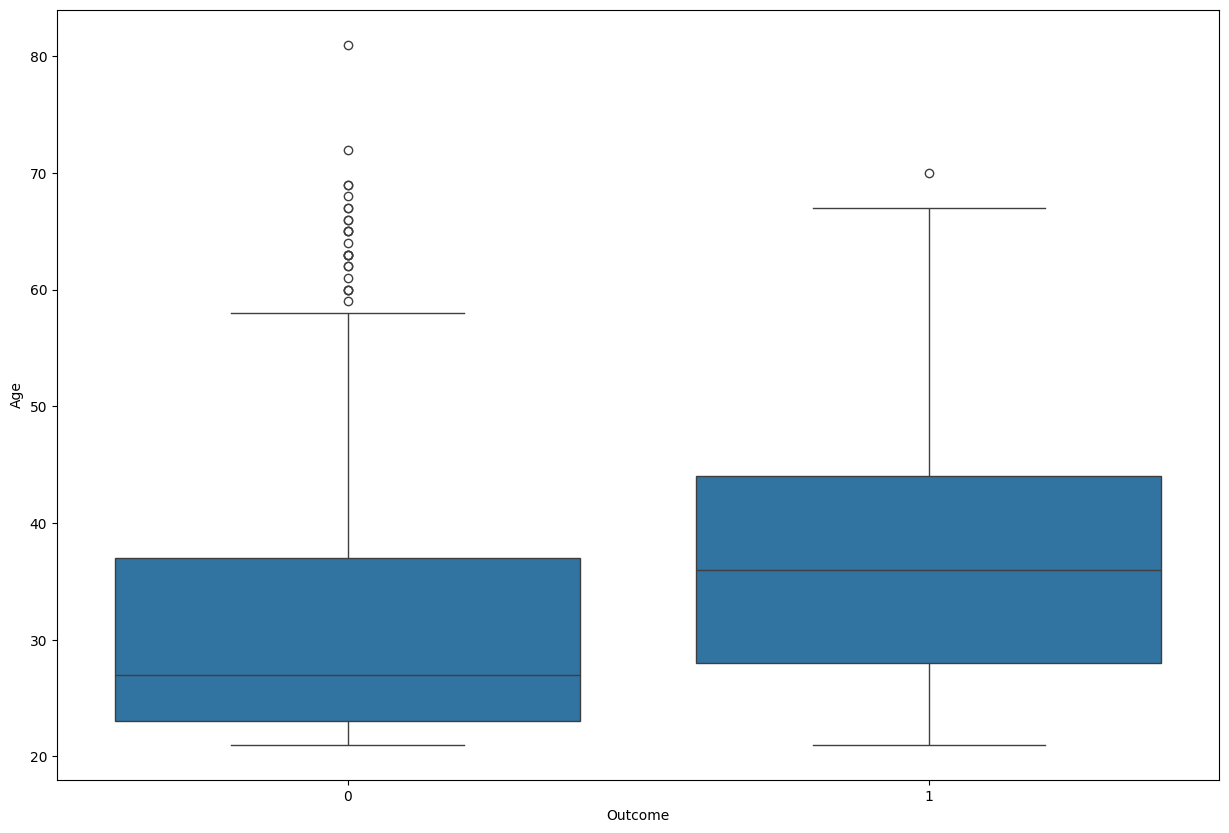

In [24]:
#show the relation between Age and diapetic disease
plt.figure(figsize=(15,10))
sns.boxplot(x='Outcome',y='Age',data=df)
plt.show()

**Insight:** Age has a significantly impact on being diabetic as higher age more likely to be diabetic patients.

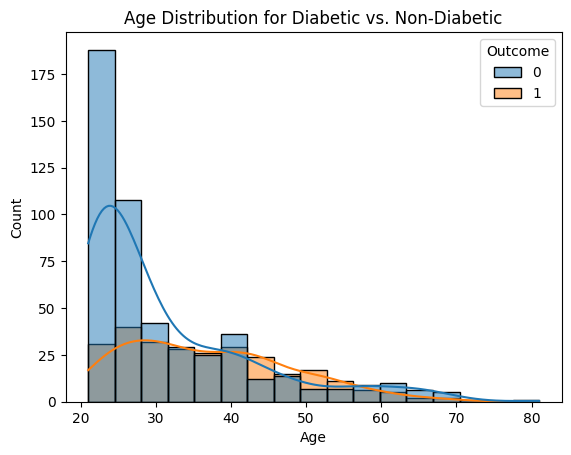

In [25]:
sns.histplot(data=df, x='Age', hue='Outcome', kde=True)
plt.title('Age Distribution for Diabetic vs. Non-Diabetic')
plt.show()

* Insight 1: The age distribution for non-diabetic people (Outcome=0) is heavily skewed towards the younger population, with a peak in the 20-30 age range.


* Insight 2: The distribution for diabetic people (Outcome=1) is more spread out across older age groups, showing that diabetes is more common in middle-aged and older individuals.


  ▶ **confirming that the risk of developing diabetes increases as individuals get older.**

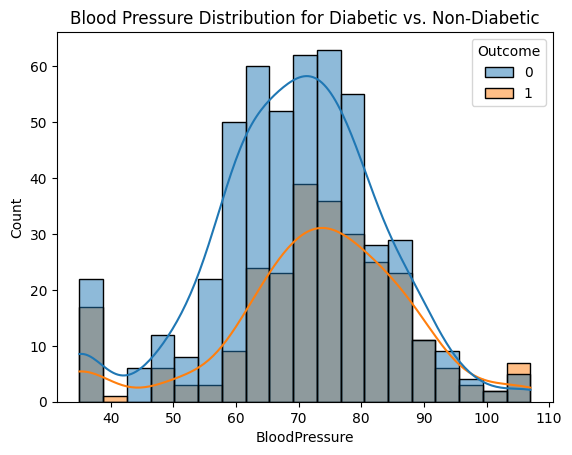

In [26]:
sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=True)
plt.title('Blood Pressure Distribution for Diabetic vs. Non-Diabetic')
plt.show()

**Insight**: blood pressure distribution reveals a significant overlap between diabetic and non-diabetic individuals.

Both groups exhibit a similar mean and distribution shape, suggesting that Blood Pressure, on its own, is not a strong predictor of diabetes in this dataset

# Feature Engineering

In [27]:
df['Age_group'] = pd.cut(df['Age'], bins=[20,30,50,80], labels=['Young','Middle','Old'])
df['BMI_group'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])


**Domain-based Features**

In [28]:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Pregnancy_per_Age'] = df['Pregnancies'] / df['Age']
df['Glucose_Insulin_ratio'] = df['Glucose'] / (df['Insulin']+1) #Insulin Sensitivity Indicator


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    float64 
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   Age_group                 767 non-null    category
 10  BMI_group                 768 non-null    category
 11  Glucose_BMI               768 non-null    float64 
 12  Pregnancy_per_Age         768 non-null    float64 
 13  Glucose_Insulin_ratio     768 non-null    float64 

In [30]:
df['Age_group'].fillna("Old",inplace=True)

C:\Users\alaa\AppData\Local\Temp\ipykernel_20244\2038166885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_group'].fillna("Old",inplace=True)


In [31]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
BMI_group                   0
Glucose_BMI                 0
Pregnancy_per_Age           0
Glucose_Insulin_ratio       0
dtype: int64

In [32]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,BMI_group,Glucose_BMI,Pregnancy_per_Age,Glucose_Insulin_ratio
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Middle,Obese,4972.8,0.120000,0.868035
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Middle,Overweight,2261.0,0.032258,0.821256
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Middle,Normal,4263.9,0.250000,1.073314
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young,Overweight,2500.9,0.047619,0.936842
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Middle,Obese,5904.7,0.000000,0.810651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Old,Obese,3322.9,0.158730,0.558011
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0,Young,Obese,4489.6,0.074074,1.178744
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Young,Overweight,3170.2,0.166667,1.070796
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1,Middle,Obese,3792.6,0.021277,0.739003


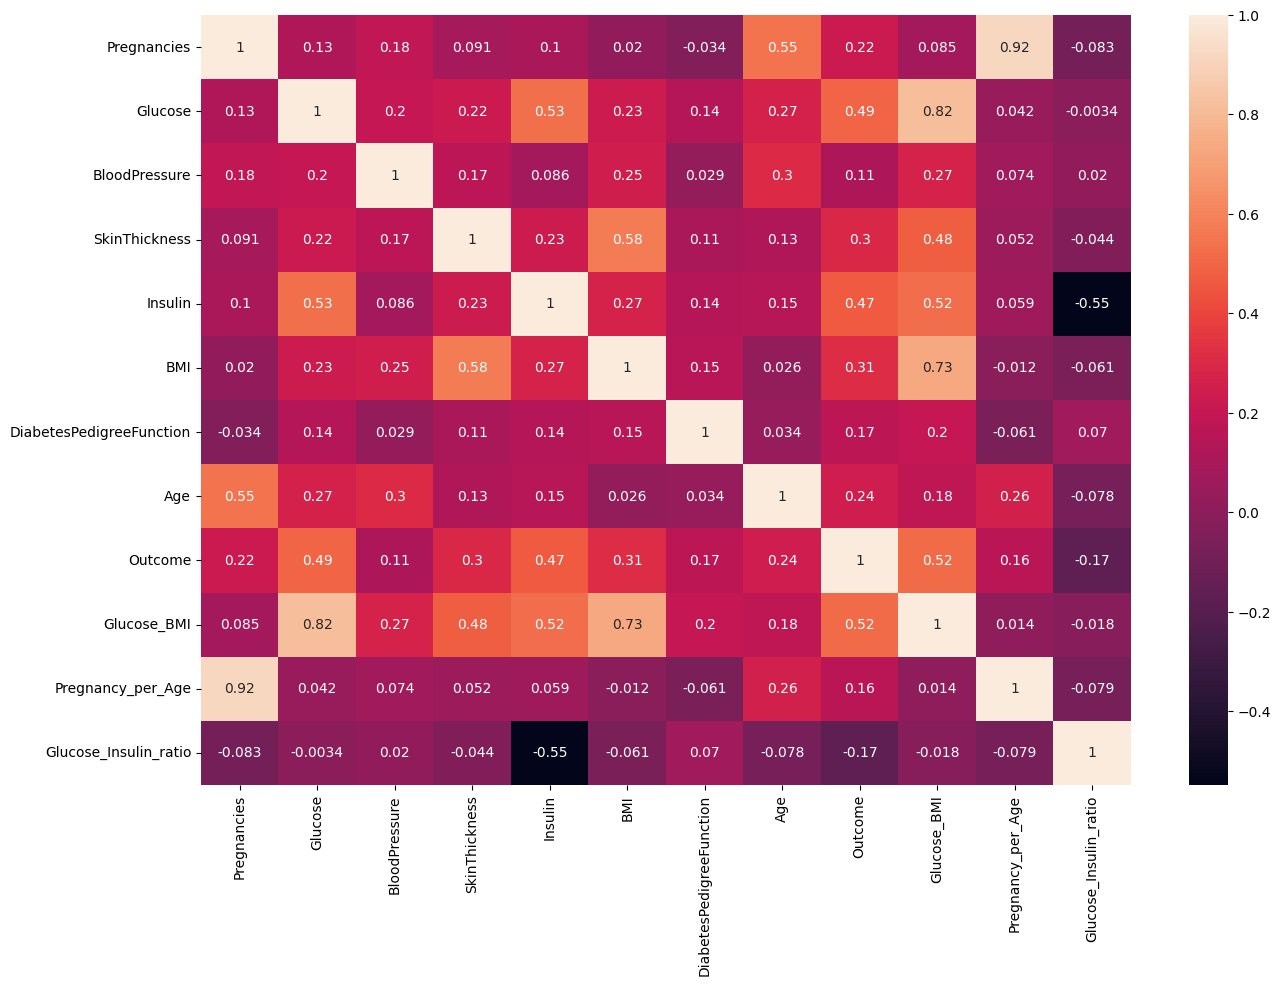

In [33]:
df_numeric = df.drop(['Age_group', 'BMI_group'], axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

#Modeling

In [34]:
#Encoding
df=pd.get_dummies(df,columns=['Age_group','BMI_group'])

**Logistic Regression**

In [35]:
# X , y
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# skewed columns
skewed_features = ['Pregnancies', 'Age', 'Insulin', 'DiabetesPedigreeFunction']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), skewed_features),
        ('scaler', StandardScaler(), [col for col in X.columns])
    ],
    remainder='passthrough'
)

log_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('log', FunctionTransformer(lambda X: np.log1p(X))),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500, random_state=42))
])

param_grid_log = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2']
}

grid_log = GridSearchCV(log_pipeline, param_grid_log, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_log.fit(X_train, y_train)

print("Best Params (LogReg):", grid_log.best_params_)
print("Best CV Score:", grid_log.best_score_)

best_log = grid_log.best_estimator_
y_pred_log = best_log.predict(X_test)
y_proba_log = best_log.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print(classification_report(y_test, y_pred_log))

train_acc = best_log.score(X_train, y_train)
test_acc = best_log.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params (LogReg): {'logreg__C': 1, 'logreg__penalty': 'l2'}
Best CV Score: 0.8862952013088101
Accuracy: 0.7792207792207793
ROC-AUC: 0.8687037037037036
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       100
           1       0.65      0.80      0.72        54

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.80      0.78      0.78       154

Train Accuracy: 0.8387622149837134
Test Accuracy: 0.7792207792207793


**SVM**

In [36]:
# Pipeline with preprocessing + SVM
svm_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('log', FunctionTransformer(lambda X: np.log1p(X))),
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

# Parameter grid
param_grid_svm = {
    'svm__C': [0.01, 0.1, 1, 10, 50, 100],
    'svm__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1],
    'svm__kernel': ['rbf', 'poly', 'sigmoid','linear']
}
# GridSearchCV
grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

# Best model
best_svm = grid_svm.best_estimator_
print("Best Params:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)

# Evaluate
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

train_acc = best_svm.score(X_train, y_train)
test_acc = best_svm.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Params: {'svm__C': 1, 'svm__gamma': 0.05, 'svm__kernel': 'rbf'}
Best CV Score: 0.896674100639448
Accuracy: 0.8636363636363636
ROC-AUC: 0.9118518518518519
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       100
           1       0.79      0.83      0.81        54

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154

Train Accuracy: 0.8957654723127035
Test Accuracy: 0.8636363636363636


**Random Forest**

In [37]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Preprocessing
skewed_features = ['Pregnancies', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
log_features = skewed_features
scaler_features = [col for col in X.columns if col not in log_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), log_features),
        ('scaler', StandardScaler(), scaler_features)
    ],
    remainder='passthrough'
)


#  Random Forest Pipeline
rf_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42, sampling_strategy=0.8)),
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, class_weight={0:1, 1:2}))
])

# Randomized Search
param_dist = {
    'rf__n_estimators': randint(300, 800),
    'rf__max_depth': [None, 5, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__bootstrap': [True, False]
}

random_rf = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Train
random_rf.fit(X_train, y_train)

print("Best Params:", random_rf.best_params_)
print("Best CV Score:", random_rf.best_score_)

# Evaluate
best_rf = random_rf.best_estimator_
y_proba = best_rf.predict_proba(X_test)[:, 1]

threshold = 0.6
y_pred = (y_proba >= threshold).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

train_acc = best_rf.score(X_train, y_train)
test_acc = best_rf.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'rf__bootstrap': True, 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 706}
Best CV Score: 0.936749723145072
Test Accuracy: 0.8701298701298701
ROC-AUC: 0.9444444444444445
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       100
           1       0.83      0.80      0.81        54

    accuracy                           0.87       154
   macro avg       0.86      0.85      0.86       154
weighted avg       0.87      0.87      0.87       154

Train Accuracy: 0.9853420195439739
Test Accuracy: 0.8701298701298701


**XGBoost**

In [38]:

# X , y
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#Preprocessing
skewed_features = ['Pregnancies', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), skewed_features),
        ('scaler', StandardScaler(), [col for col in X.columns])
    ],
    remainder='passthrough'
)

# XGBoost Pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('preprocess', preprocessor),
    ('xgb', XGBClassifier(
        eval_metric='auc',
        random_state=42,
        tree_method='hist',
        use_label_encoder=False
    ))
])

# Random Search Parameter Grid
param_dist_xgb = {
    'xgb__n_estimators': [200, 400, 600, 800],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.2, 0.3]
}

# RandomizedSearchCV
rand_xgb = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rand_xgb.fit(X_train, y_train)

print("Best Params:", rand_xgb.best_params_)
print("Best CV Score:", rand_xgb.best_score_)

# Evaluate
best_xgb = rand_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

train_acc = best_xgb.score(X_train, y_train)
test_acc = best_xgb.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\alaa\anaconda3\envs\mynewenv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'xgb__subsample': 0.8, 'xgb__n_estimators': 800, 'xgb__min_child_weight': 5, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.7}
Best CV Score: 0.9435954120463376
Test Accuracy: 0.8896103896103896
ROC-AUC: 0.9505555555555555
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.82      0.87      0.85        54

    accuracy                           0.89       154
   macro avg       0.88      0.89      0.88       154
weighted avg       0.89      0.89      0.89       154

Train Accuracy: 0.9576547231270358
Test Accuracy: 0.8896103896103896


# Model Comparison Summary

| Model               | Train Accuracy | Test Accuracy | ROC-AUC  | Precision (class 1) | Recall (class 1) | F1-score (class 1) |
|--------------------|---------------|---------------|----------|--------------------|-----------------|------------------|
| Logistic Regression | 0.8388        | 0.7792        | 0.8685   | 0.65               | 0.80            | 0.72             | 
| SVM (RBF)           | 0.8958        | 0.8636        | 0.9119   | 0.79               | 0.83            | 0.81             | 
| Random Forest       | 0.9853        | 0.8701        | 0.9444   | 0.83               | 0.80            | 0.81             | 
| XGBoost             | 0.9573        | 0.8961        | 0.9546   | 0.82               | 0.87         | 0.85             | 


## ✅ Conclusion
- **Overall Best Model:** **XGBoost**, based on **ROC-AUC**, **accuracy**, and **F1-score**.


**Save model**

In [41]:
import joblib

joblib.dump(best_xgb, "xgb_model.joblib")


['xgb_model.joblib']